In [1]:
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import numpy as np

In [2]:
def feature_selection(dataframe,var_type):
    if var_type=="numerical":
        
        num_cols=dataframe.select_dtypes(include=['float64','int64']).columns
        num_cols=list(num_cols)
        return num_cols
    
    elif var_type=="categorical":
        cat_cols=dataframe.select_dtypes(include=['object','string']).columns
        cat_cols=list(cat_cols)
        return cat_cols

In [3]:
def ascii(name):
    ascii_text = unidecode(name)
    return ascii_text

In [4]:
def full_name(name):
    raw_name=name.split("-")
    correct_name=raw_name[0].split()
    full_name = ' '.join(correct_name)
    return full_name

In [5]:
players=pd.read_csv("C:/Users/Mateusz/Downloads/players.csv")
stats=pd.read_csv("C:/Users/Mateusz/Downloads/stats.csv")
wages=pd.read_csv("C:/Users/Mateusz/Downloads/wages.csv")

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_17108\49726476.py:3: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  wages=pd.read_csv("C:/Users/Mateusz/Downloads/wages.csv")


In [6]:
wages=wages[['short_name','long_name','wage_eur','club_name','fifa_version','league_name','potential']]
wages=wages[wages['fifa_version']==24.0]

In [7]:
stats['corrected_name']=stats['full_name'].apply(ascii)
players['fixed_name']=players['name'].apply(ascii)
wages['name']=wages['long_name'].apply(ascii)

In [8]:
players_relevant=players[['fixed_name','market_value_in_eur']]

In [9]:
stats=stats.merge(players_relevant, left_on='corrected_name', right_on='fixed_name', how='left')

In [10]:
data=stats[['nationality','Current Club','ratings_total_overall','minutes_played_overall','age','corrected_name','appearances_overall','assists_overall','position','goals_involved_per_90_overall','assists_per_90_overall','goals_per_90_overall','average_rating_overall','passes_completed_per_90_overall','key_passes_per_90_overall','possession_regained_per_90_overall','tackles_successful_per_90_overall','interceptions_per_90_overall','dribbles_successful_per_90_overall','chances_created_per_90_overall','pressures_per_90_overall','dispossesed_per_90_overall','distance_travelled_per_90_overall','annual_salary_eur','market_value_in_eur']]


In [11]:
data=data[(data['average_rating_overall']>0) & (data['market_value_in_eur']>0) & (data['minutes_played_overall']>270)]

In [12]:
data['average_rating_overall'].mean()

7.600746268656716

In [13]:
data['market_value_in_eur'].mean()

32870149.253731344

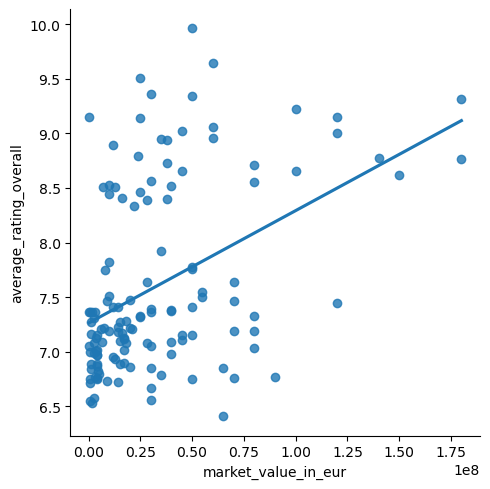

In [15]:
sns.lmplot(x='market_value_in_eur', y='average_rating_overall', data=data, ci=None)

In [14]:
Over_performing=data[(data['average_rating_overall']>7.6) & (data['market_value_in_eur']<=33000000)]

In [15]:
Under_performing=data[(data['average_rating_overall']<=7.6) & (data['market_value_in_eur']>=33000000)]

In [16]:
Over_performing = Over_performing[~Over_performing['corrected_name'].isin(['Rodri'])]

In [17]:
Under_performing.reset_index(inplace=True,drop=['index'])
Over_performing.reset_index(inplace=True,drop=['index'])

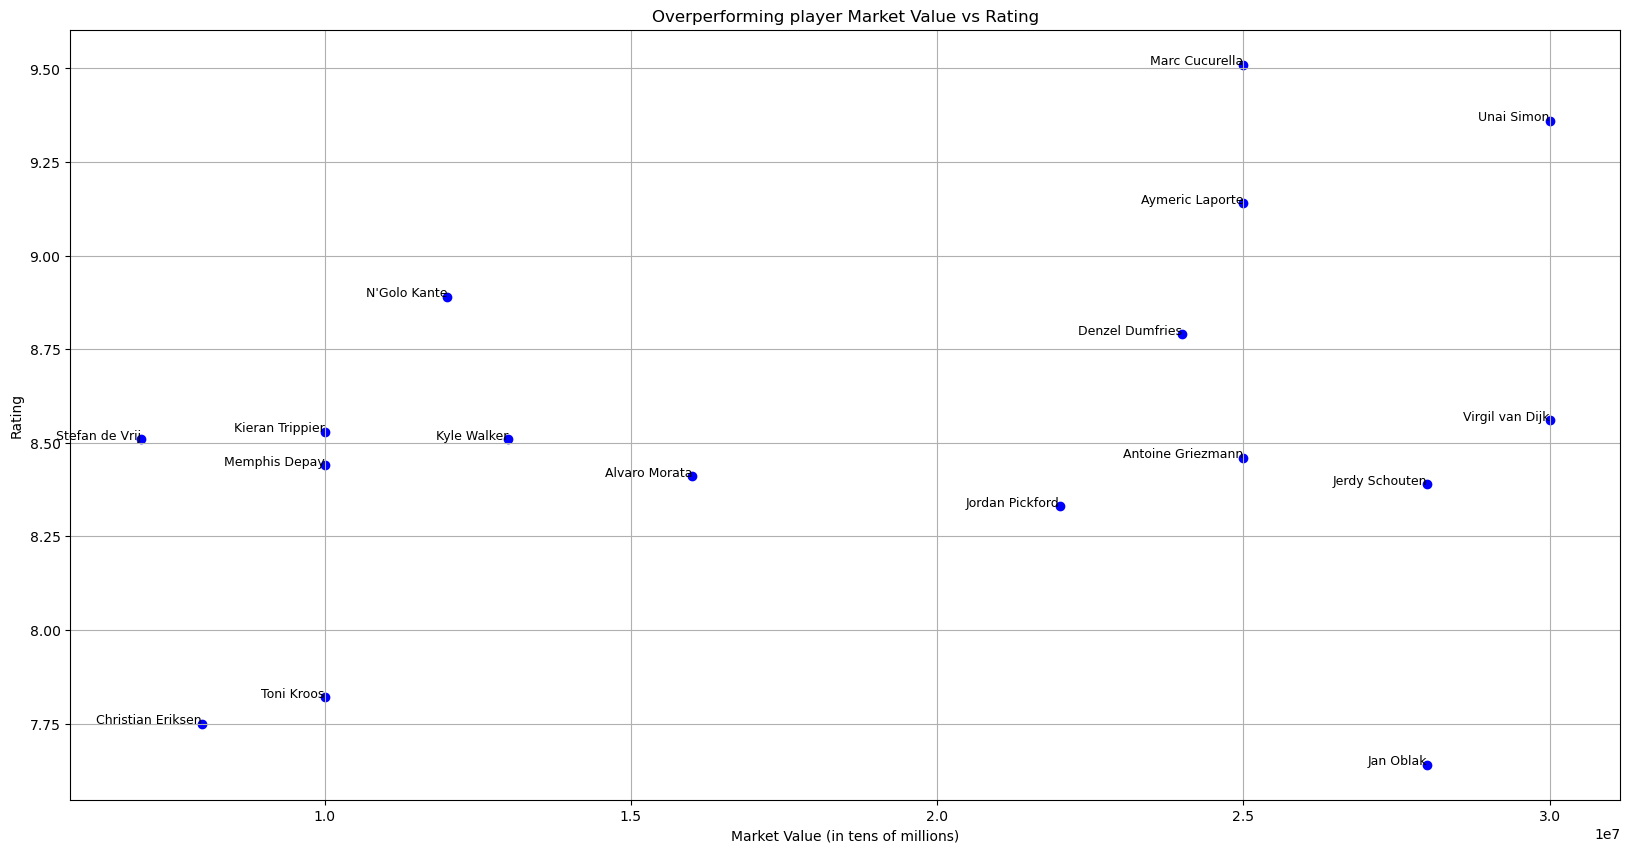

In [22]:
plt.figure(figsize=(20, 10))
plt.scatter(Over_performing['market_value_in_eur'], Over_performing['average_rating_overall'], color='blue')

# Add labels to each point
for i in range(len(Over_performing)):
    plt.text(Over_performing['market_value_in_eur'][i], Over_performing['average_rating_overall'][i], Over_performing['corrected_name'][i], fontsize=9, ha='right')

# Set the title and labels
plt.title('Overperforming player Market Value vs Rating')
plt.xlabel('Market Value (in tens of millions)')
plt.ylabel('Rating')

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()

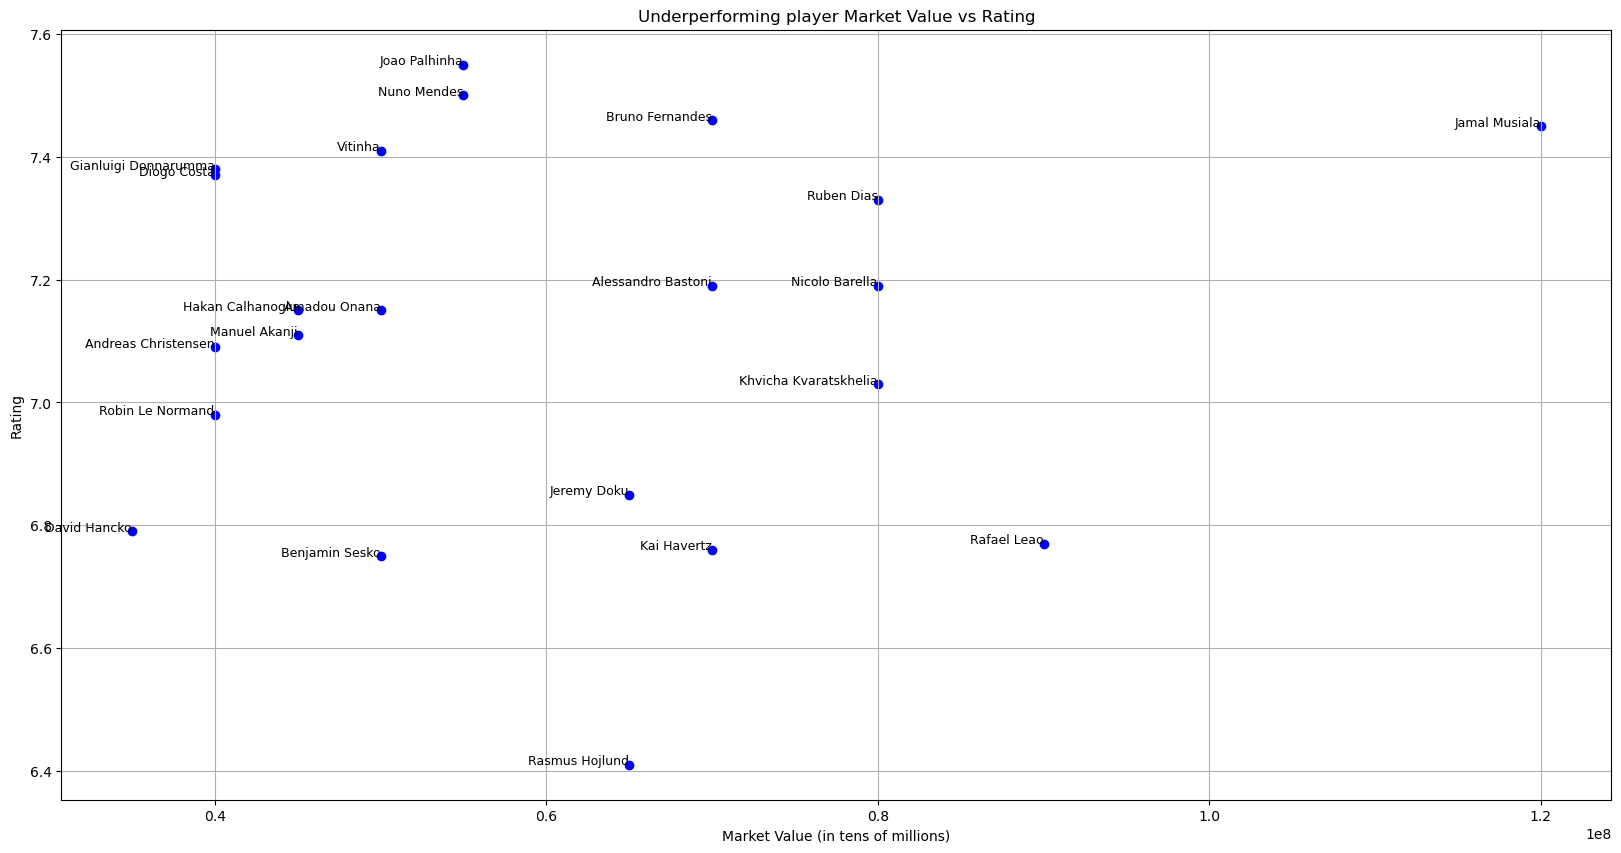

In [23]:
plt.figure(figsize=(20, 10))
plt.scatter(Under_performing['market_value_in_eur'], Under_performing['average_rating_overall'], color='blue')

# Add labels to each point
for i in range(len(Under_performing)):
    plt.text(Under_performing['market_value_in_eur'][i], Under_performing['average_rating_overall'][i], Under_performing['corrected_name'][i], fontsize=9, ha='right')

# Set the title and labels
plt.title('Underperforming player Market Value vs Rating')
plt.xlabel('Market Value (in tens of millions)')
plt.ylabel('Rating')

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()

In [20]:
count_data = Under_performing['Current Club'].value_counts().reset_index()
sorted_data = count_data.sort_values(by='count', ascending=False)

Text(0.5, 0, 'Country')

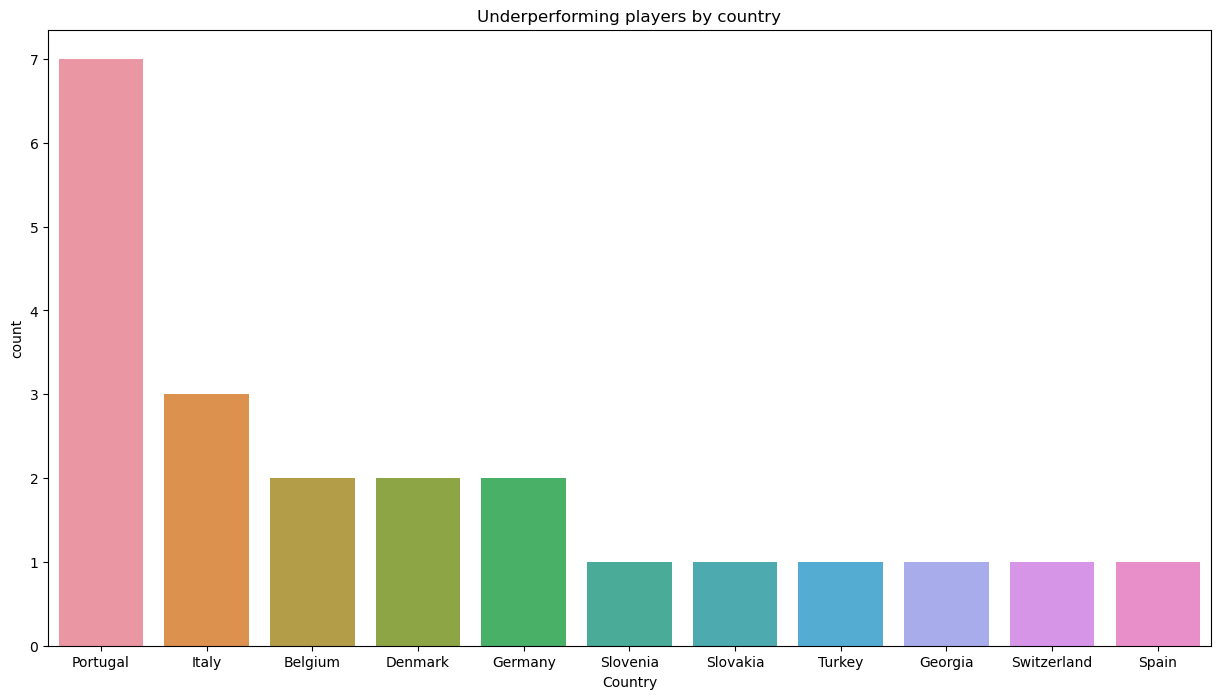

In [21]:
fig=plt.figure(figsize=(15,8))
sns.countplot(x=Under_performing['Current Club'],order=sorted_data['Current Club'])
plt.title('Underperforming players by country')
plt.xlabel('Country')

In [26]:
count_data = Over_performing['Current Club'].value_counts().reset_index()

In [27]:
sorted_data = count_data.sort_values(by='count', ascending=False)

Text(0.5, 0, 'Country')

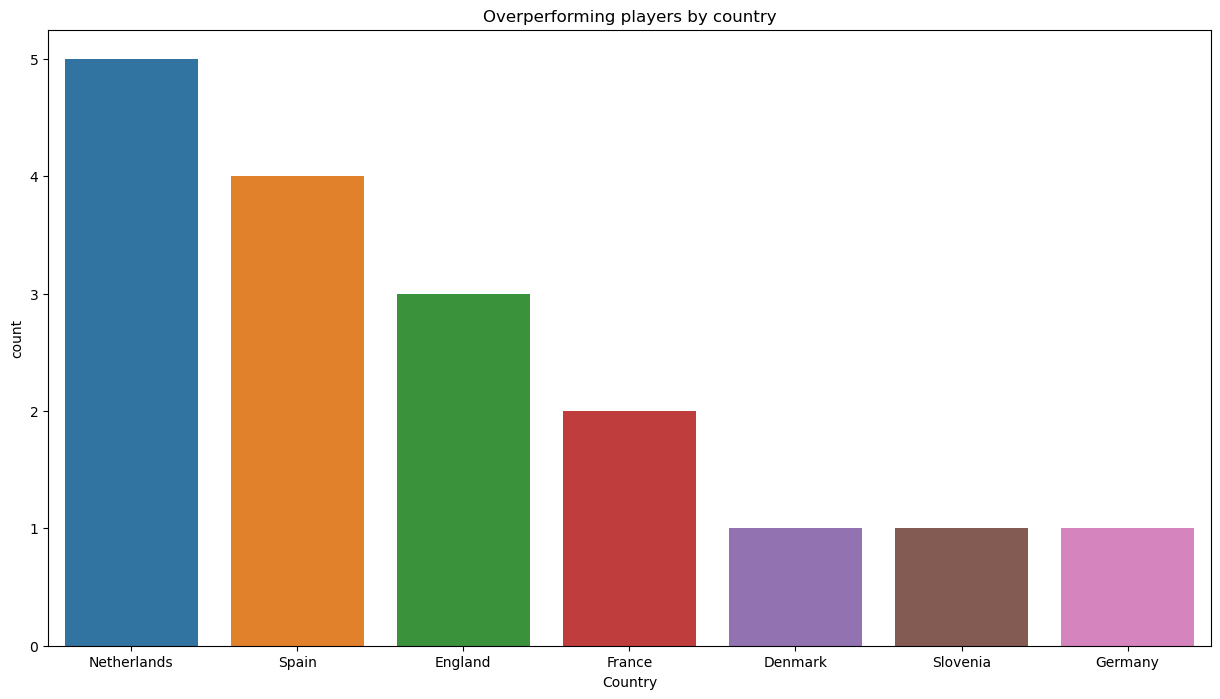

In [28]:
fig=plt.figure(figsize=(15,8))
sns.countplot(x=Over_performing['Current Club'],order=sorted_data['Current Club'])
plt.title('Overperforming players by country')
plt.xlabel('Country')

In [18]:
wages['name']=wages['name'].replace(['Amadou Zeund Georges Ba Mvom Onana','Andreas Bodtker Christensen','Bruno Miguel Borges Fernandes','Diogo Meireles Costa',
                                     'Joao Maria Lobo Alves Palhinha Goncalves','Kai Lukas Havertz','Manuel Obafemi Akanji','Nuno Alexandre Tavares Mendes','Rafael Alexandre Conceicao Leao',
                                     'Rasmus Winther Hojlund','Ruben dos Santos Gato Alves Dias','Vitor Machado Ferreira'],['Amadou Onana','Andreas Christensen','Bruno Fernandes','Diogo Costa','Joao Palhinha','Kai Havertz','Manuel Akanji','Nuno Mendes','Rafael Leao','Rasmus Hojlund','Ruben Dias','Vitinha'])

In [19]:
Under_performing=Under_performing.merge(wages,left_on='corrected_name',right_on='name', how='left')

In [20]:
wages['name']=wages['name'].replace(['Alvaro Borja Morata Martin','Christian Dannemann Eriksen','Denzel Justus Morris Dumfries',
                                     'Marc Cucurella Saseta','Unai Simon Mendibil'],['Alvaro Morata','Christian Eriksen','Denzel Dumfries','Marc Cucurella','Unai Simon'])

In [21]:
Over_performing=Over_performing.merge(wages,left_on='corrected_name',right_on='name', how='left')

In [33]:
count_data = Under_performing['league_name'].value_counts().reset_index()
sorted_data = count_data.sort_values(by='count', ascending=False)

Text(0.5, 0, 'League')

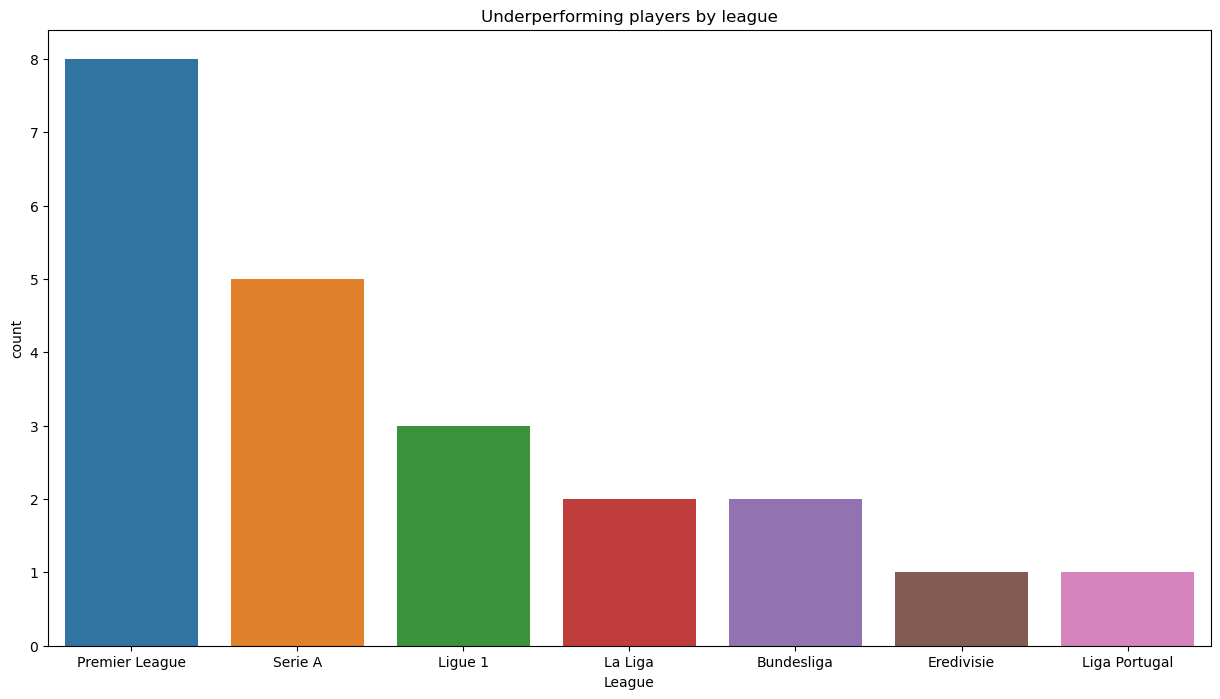

In [34]:
fig=plt.figure(figsize=(15,8))
sns.countplot(x=Under_performing['league_name'],order=sorted_data['league_name'])
plt.title('Underperforming players by league')
plt.xlabel('League')

In [35]:
count_data = Over_performing['league_name'].value_counts().reset_index()
sorted_data = count_data.sort_values(by='count', ascending=False)

Text(0.5, 0, 'league')

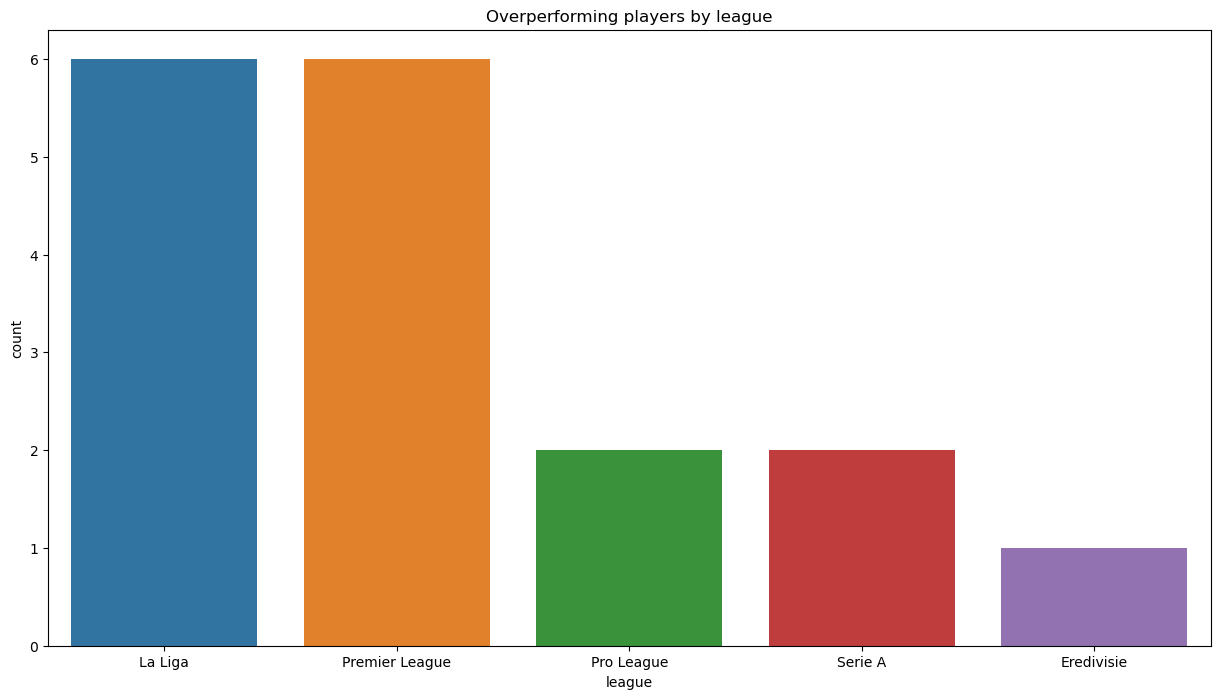

In [36]:
fig=plt.figure(figsize=(15,8))
sns.countplot(x=Over_performing['league_name'],order=sorted_data['league_name'])
plt.title('Overperforming players by league')
plt.xlabel('league')

In [22]:
Under_performing['performance']='Under_performing'
Over_performing['performance']='Over_performing'
performance=pd.concat([Under_performing, Over_performing], ignore_index=True)

In [ ]:
##zrobic taki wykres dla najlepszego over_perfroming vs najgorszego underperfroming

In [28]:
Under_performing[Under_performing['average_rating_overall']==Under_performing['average_rating_overall'].min()]

,nationality,Current Club,ratings_total_overall,minutes_played_overall,age,corrected_name,appearances_overall,assists_overall,position,goals_involved_per_90_overall,...,market_value_in_eur,short_name,long_name,wage_eur,club_name,fifa_version,league_name,potential,name,performance
18,Denmark,Denmark,25.66,290,21,Rasmus Hojlund,4,0,Forward,0.0,...,65000000.0,R. Højlund,Rasmus Winther Højlund,72000.0,Manchester United,24.0,Premier League,89,Rasmus Hojlund,Under_performing


In [29]:
Over_performing[Over_performing['average_rating_overall']==Over_performing['average_rating_overall'].max()]

,nationality,Current Club,ratings_total_overall,minutes_played_overall,age,corrected_name,appearances_overall,assists_overall,position,goals_involved_per_90_overall,...,market_value_in_eur,short_name,long_name,wage_eur,club_name,fifa_version,league_name,potential,name,performance
10,Spain,Spain,38.02,516,26,Marc Cucurella,6,1,Defender,0.17,...,25000000.0,Cucurella,Marc Cucurella Saseta,80000.0,Chelsea,24.0,Premier League,83,Marc Cucurella,Over_performing


In [34]:
radar_data=performance[performance['corrected_name'].isin(['Marc Cucurella','Bruno Fernandes'])]

In [35]:
radar_data=radar_data[['corrected_name','average_rating_overall','wage_eur','market_value_in_eur','potential']]

In [36]:
radar_data.rename(columns={'average_rating_overall':'Rating','market_value_in_eur':'Value','wage_eur':'Wage','potential':'Potential'},inplace=True)

In [32]:
radar_data

,corrected_name,Rating,wage_eur,Value,potential
4,Bruno Fernandes,7.46,260000.0,70000000.0,88
32,Marc Cucurella,9.51,80000.0,25000000.0,83


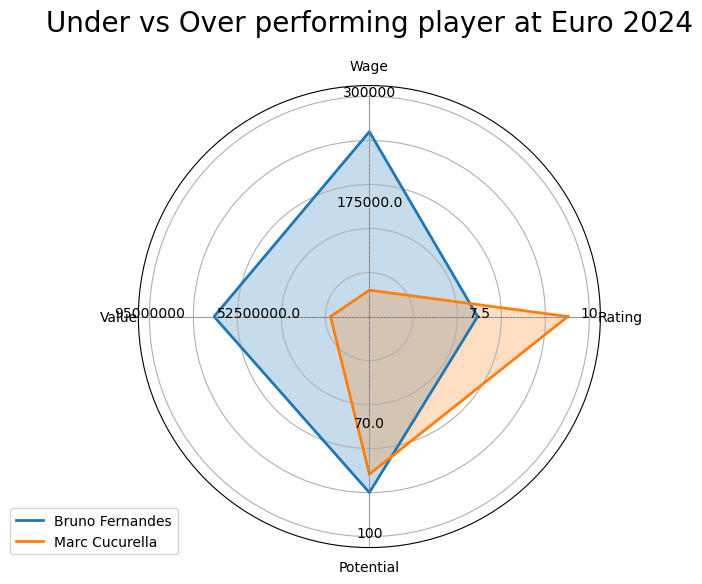

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a sample DataFrame with two rows

df = radar_data

# Step 2: Prepare data for plotting
categories = df.columns[1:]  # Categories from columns (excluding 'Name')
values = df.iloc[:, 1:].values  # All values

# Number of variables we're plotting
num_vars = len(categories)

# Compute angle for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Custom range for each category
custom_ranges = {
    'Rating': (5, 10),       # Custom range for category A
    'Wage': (50000, 300000),    # Custom range for category B
    'Value': (10000000, 95000000),   # Custom range for category C
    'Potential': (40, 100)        # Custom range for category D
}

#radar_data=radar_data[['corrected_name','average_rating_overall','wage_eur','market_value_in_eur','potential']]


# Initialize the spider plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each row of values with custom scaling
for i, row in enumerate(values):
    scaled_data = []
    for j, value in enumerate(row):
        cat = categories[j]
        min_val, max_val = custom_ranges[cat]
        # Scale the value based on its custom range
        scaled_value = (value - min_val) / (max_val - min_val) * 100  # Normalize to 0-100 for easier plotting
        scaled_data.append(scaled_value)
    
    scaled_data.append(scaled_data[0])  # Closing the loop for data
    ax.plot(angles, scaled_data, linewidth=2, linestyle='solid', label=df.iloc[i, 0])
    ax.fill(angles, scaled_data, alpha=0.25)

# Add custom ticks and labels for each axis manually
for i, (angle, category) in enumerate(zip(angles[:-1], categories)):
    min_val, max_val = custom_ranges[category]
    ticks = [0, 50, 100]  # Normalized scale (0-100)
    tick_labels = [f'{min_val}', f'{(min_val + max_val) / 2}', f'{max_val}']
    
    # Draw custom radial lines and labels
    for tick, label in zip(ticks, tick_labels):
        if tick != 0:  # Skip the central tick
            value = tick / 100 * (max_val - min_val) + min_val  # Convert normalized value back to original range
            radius = tick  # Use normalized scale for radial line length
            ax.plot([angle, angle], [0, radius], color='gray', linestyle='--', linewidth=0.5)
            ax.text(angle, radius + 0.1, label, horizontalalignment='center', size=10, color='black')

# Customize the axes
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)


# Add a title
plt.title("Under vs Over performing player at Euro 2024", size=20, color='black', y=1.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()
